## Clustering Modelling Exercises

30 January 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from env import sql_connexion

from prepare import tts



In [2]:
iris = pd.read_csv('iris_db.csv')

### 1 . Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    b. Visualize the results of your clustering.
    c. Use the elbow method to visually select a good value for k.
    d. Repeat the clustering, this time with 3 different features.



In [3]:
# dropping unneeded column

iris = iris.drop(columns = 'Unnamed: 0')

In [4]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [5]:
# split into tvt

train, val, test = tts(iris)
train.shape, val.shape, test.shape

((84, 5), (36, 5), (30, 5))

I will analyse petal_length against sepal_width.

In [6]:
# setting X to contain train of two variables

X = train[['petal_length', 'sepal_length']]


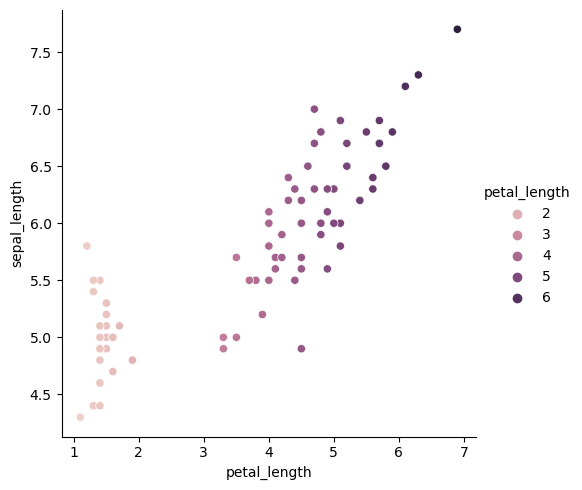

In [7]:
# looking at the dataframe

sns.relplot(data = train, x = 'petal_length', y = 'sepal_length', hue = 'petal_length')
plt.show()

In [8]:
# creating & setting KMeans to unscaled data
kmeans = KMeans(n_clusters = 4, random_state = 23)

# fitting to X variable
kmeans.fit(X)

# predicting to X variable
kmeans.predict(X)

array([1, 2, 0, 0, 0, 1, 1, 1, 3, 3, 0, 3, 0, 3, 1, 0, 1, 1, 1, 0, 0, 2,
       1, 3, 2, 1, 3, 3, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 3, 1, 1, 2, 2,
       1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 3, 0, 2, 0,
       0, 0, 3, 2, 2, 2, 1, 2, 3, 1, 2, 1, 3, 2, 1, 1, 2, 1], dtype=int32)

In [9]:
# adding unscaled to df
# can be added to either train or to X

X['unscaled_clusters'] = kmeans.predict(X)


/var/folders/v1/7y2hc6q17wl2rjlpg8h9g78h0000gn/T/ipykernel_1813/3774638023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['unscaled_clusters'] = kmeans.predict(X)


In [10]:
X.head()

,petal_length,sepal_length,unscaled_clusters
24,1.9,4.8,1
83,5.1,6.0,2
55,4.5,5.7,0
90,4.4,5.5,0
95,4.2,5.7,0


### scaling the data


In [11]:
# scaling the data
mm_scaler = MinMaxScaler()

X[['petal_length', 'sepal_length']] = mm_scaler.fit_transform(X[['petal_length', 'sepal_length']])

X.head()


/var/folders/v1/7y2hc6q17wl2rjlpg8h9g78h0000gn/T/ipykernel_1813/689582198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['petal_length', 'sepal_length']] = mm_scaler.fit_transform(X[['petal_length', 'sepal_length']])


,petal_length,sepal_length,unscaled_clusters
24,0.137931,0.147059,1
83,0.689655,0.500000,2
55,0.586207,0.411765,0
90,0.568966,0.352941,0
95,0.534483,0.411765,0


In [12]:
# fitting KMeans scaler to the scaled train dataset

kmeans_scaled = KMeans(n_clusters = 4, random_state = 23)
kmeans_scaled.fit(X[['petal_length', 'sepal_length']])

KMeans(n_clusters=4, random_state=23)

In [13]:
# looking at the predicted array

kmeans_scaled.predict(X[['petal_length', 'sepal_length']])

array([0, 1, 3, 3, 3, 0, 0, 0, 1, 2, 3, 1, 3, 2, 0, 3, 0, 0, 0, 3, 3, 1,
       0, 2, 1, 0, 2, 1, 3, 3, 1, 0, 0, 1, 0, 0, 0, 1, 3, 2, 0, 0, 1, 1,
       0, 3, 1, 1, 1, 1, 3, 0, 3, 3, 1, 0, 1, 0, 0, 1, 3, 1, 2, 3, 1, 3,
       3, 3, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0], dtype=int32)

In [14]:
# adding new column to train df with scaled data

X['scaled_clusters'] = kmeans_scaled.predict(X[['petal_length', 'sepal_length']])

/var/folders/v1/7y2hc6q17wl2rjlpg8h9g78h0000gn/T/ipykernel_1813/705745334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['scaled_clusters'] = kmeans_scaled.predict(X[['petal_length', 'sepal_length']])


In [15]:
X.head()

,petal_length,sepal_length,unscaled_clusters,scaled_clusters
24,0.137931,0.147059,1,0
83,0.689655,0.500000,2,1
55,0.586207,0.411765,0,3
90,0.568966,0.352941,0,3
95,0.534483,0.411765,0,3


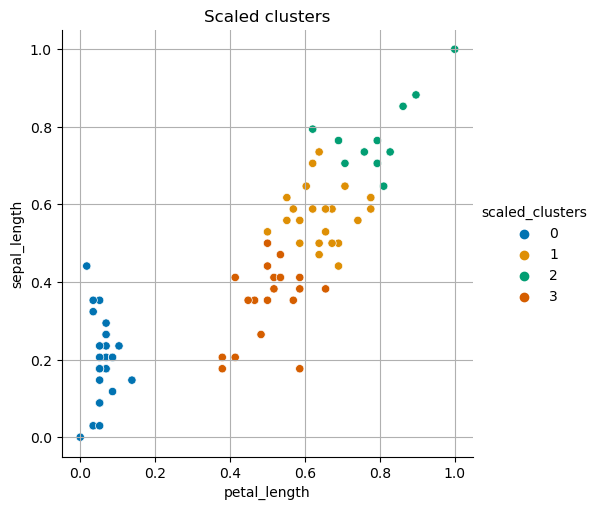

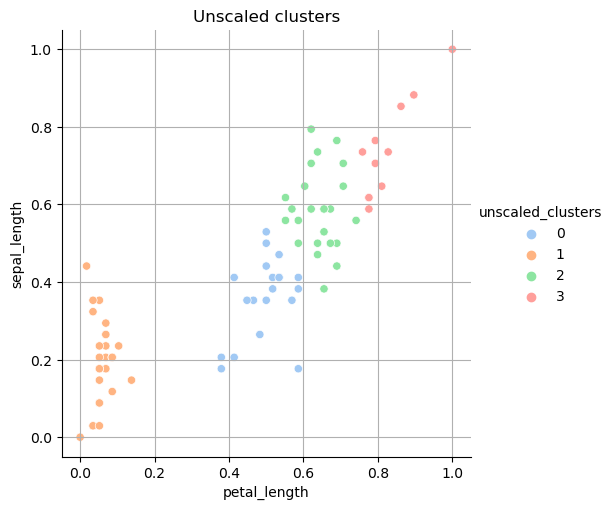

In [16]:
sns.relplot(data = X, x = 'petal_length', y = 'sepal_length', hue = 'scaled_clusters', palette = 'colorblind')
plt.title('Scaled clusters')
plt.grid()
plt.show()

sns.relplot(data = X, x = 'petal_length', y = 'sepal_length', hue = 'unscaled_clusters', palette = 'pastel')
plt.title('Unscaled clusters')
plt.grid()
plt.show()

TAkeaway : There are four clusters. One cluster is distinct ; the three others blend in to each other.  The scaled and unscaled clsters are slightly different.x

## Looking at inertia

In [17]:
# looking at numeric / theoretical centre of the clusters

kmeans_scaled.cluster_centers_

array([[0.06034483, 0.19327731],
       [0.6487069 , 0.57352941],
       [0.79597701, 0.7745098 ],
       [0.50517241, 0.35294118]])

In [18]:
# finding the inertia drop

kmeans_scaled.inertia_


1.0576855032073678

In [19]:
# creating the inertia loop

inertia = []
seed = 23

for i in range (1, 7):
    
    # i clusters allows for clusters to increment as the loop loops
    kmeans = KMeans(n_clusters = i, random_state = seed)
    
    kmeans.fit(X[['petal_length', 'sepal_length']])
    
    # alt : kmeans.fit(X)
    
    # append the inertia of the particular loop to the list of inertias
    inertia.append(kmeans.inertia_)
    
inertia

[11.346838877188977,
 2.84061505627732,
 1.4794989394040465,
 1.0576855032073678,
 0.8514823272313833,
 0.6669360471653261]

In [20]:
# making into a df

inertia_df = pd.DataFrame({'n_clusters' : list(range(1, 7)),
                            'inertia' : inertia})
inertia_df

,n_clusters,inertia
0,1,11.346839
1,2,2.840615
2,3,1.479499
3,4,1.057686
4,5,0.851482
5,6,0.666936


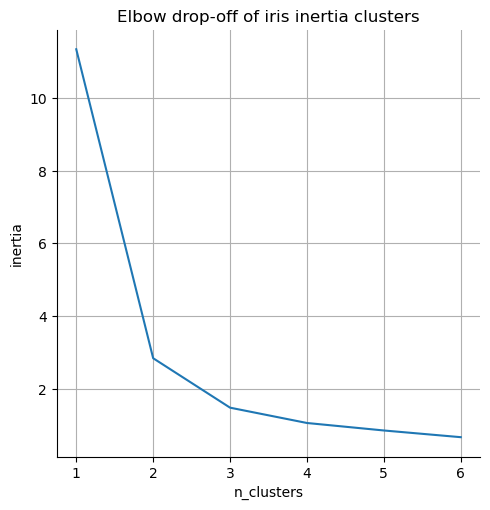

In [21]:
# plotting the inertia results

sns.relplot(data = inertia_df, x = 'n_clusters', y = 'inertia', kind = 'line')
plt.title('Elbow drop-off of iris inertia clusters')
plt.grid()
plt.show()

Takeaway : In this case, the best number of clusters is 2.

## With three different features

X = data.iloc[:,numG : numH].values

In [22]:
train.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species_name
24,4.8,3.4,1.9,0.2,setosa


In [23]:
# setting x for 3 features

X3 = train[['petal_length', 'petal_width', 'sepal_length']]

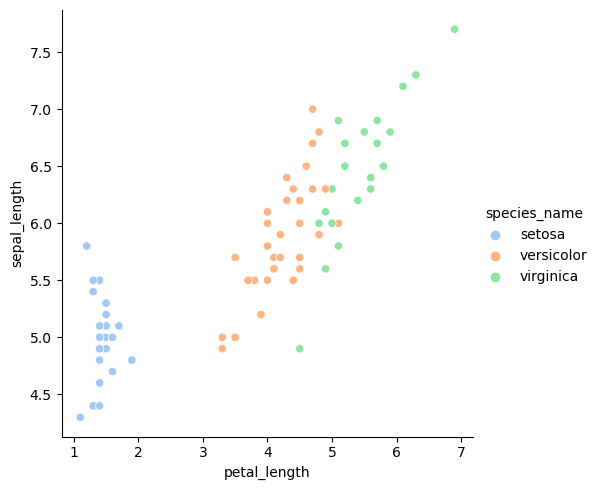

In [24]:
# looking at the dataframe

sns.relplot(data = train, x = 'petal_length', y = 'sepal_length', hue = 'species_name', palette = 'pastel')
plt.show()


In [25]:
# scaling the data
mm_scaler = MinMaxScaler()

X3[['petal_length', 
    'petal_width', 'sepal_length']] = mm_scaler.fit_transform(X3[['petal_length', 
                                                                  'petal_width', 'sepal_length']])

X3.head()


/var/folders/v1/7y2hc6q17wl2rjlpg8h9g78h0000gn/T/ipykernel_1813/1489038068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3[['petal_length',


,petal_length,petal_width,sepal_length
24,0.137931,0.041667,0.147059
83,0.689655,0.625000,0.500000
55,0.586207,0.500000,0.411765
90,0.568966,0.458333,0.352941
95,0.534483,0.458333,0.411765


In [26]:
# fitting KMeans scaler to the scaled train dataset

kmeans_scaled3 = KMeans(n_clusters = 3, random_state = 23)
kmeans_scaled3.fit(X3[['petal_length', 'petal_width','sepal_length']])

KMeans(n_clusters=3, random_state=23)

In [27]:
# looking at the predicted array

kmeans_scaled3.predict(X3[['petal_length', 'petal_width', 'sepal_length']])

array([0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0], dtype=int32)

In [28]:
# adding new column to train df with scaled data

X3['scaled_clusters'] = kmeans_scaled3.predict(X3[['petal_length', 'petal_width','sepal_length']])

/var/folders/v1/7y2hc6q17wl2rjlpg8h9g78h0000gn/T/ipykernel_1813/484775962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3['scaled_clusters'] = kmeans_scaled3.predict(X3[['petal_length', 'petal_width','sepal_length']])


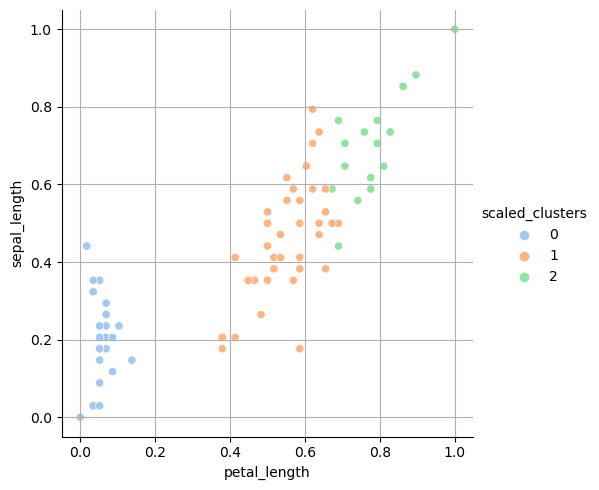

In [29]:
# plotting

sns.relplot(data = X3, x = 'petal_length', y = 'sepal_length', hue = 'scaled_clusters', palette = 'pastel')
plt.grid()
plt.show()

In [30]:
# # looking at numeric / theoretical centre of the clusters

# centroids = pd.DataFrame(kmeans_scaled3.cluster_centers_, columns = X3.columns)
# centroids

In [31]:
# finding the inertia drop

kmeans_scaled3.inertia_


2.418190705482219

In [32]:
# inertia loop

inertia = []
seed = 23

for i in range (1, 7):
    
    # clustering increments
    kmeans = KMeans(n_clusters = i, random_state = seed)
    
    kmeans.fit(X3[['petal_length', 'petal_width', 'sepal_length']])
    
    # append the inertia
    inertia.append(kmeans.inertia_)
    
inertia

[20.017535801792157,
 4.970304563952981,
 2.418190705482219,
 1.6090615730173474,
 1.3879707985087655,
 1.218346171293313]

In [33]:
# creating a df for 3 features

inertia3_df = pd.DataFrame({'n_clusters' : list(range(1,7)),
                           'inertia' : inertia})
inertia3_df

,n_clusters,inertia
0,1,20.017536
1,2,4.970305
2,3,2.418191
3,4,1.609062
4,5,1.387971
5,6,1.218346


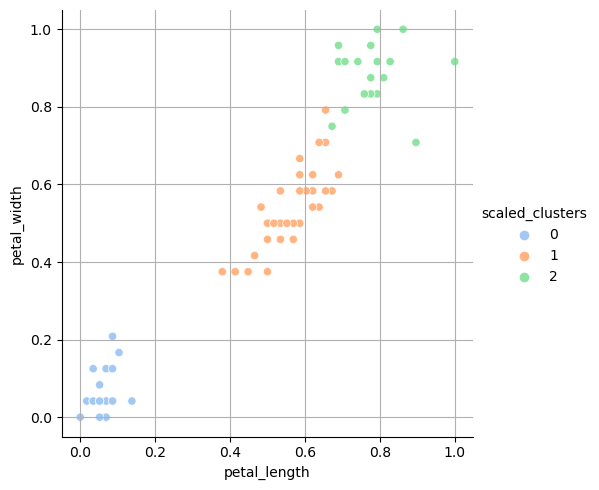

In [34]:
# plotting for 3 features, scaled iris

sns.relplot(data = X3, x = 'petal_length', y = 'petal_width', hue = 'scaled_clusters', palette = 'pastel',
           label = 'cluster' + str('centroids'))

plt.grid()
plt.show()

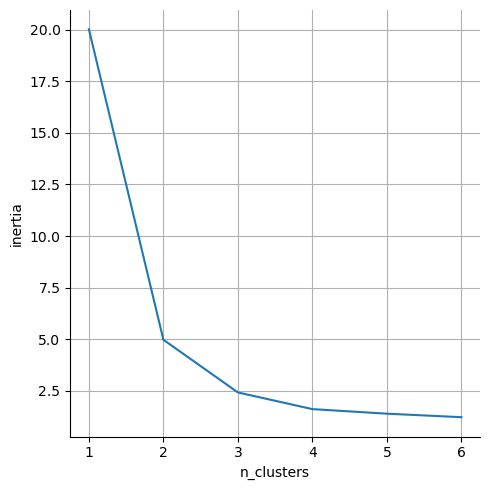

In [35]:
sns.relplot(data = inertia3_df, x = 'n_clusters', y = 'inertia', kind = 'line')
plt.grid()
plt.show()

Takeaway : 2 is the best number of clusters

## 2 . Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise, to perform clustering on the mall customers dataset. Visualize your results.


In [36]:
# Mall customers

# def retrieve_mall(df):
mall_query = '''
            SELECT * 
            FROM customers
            '''

mall_url = sql_connexion('mall_customers')

mall_df = pd.read_sql(mall_query, mall_url)
    
#     return mall_df

# this function does not (yet) work

In [37]:
mall_df.head(1)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39


In [38]:
# slpit into train, val, test

trainm, valm, testm = tts(mall_df)
trainm.shape

(112, 5)

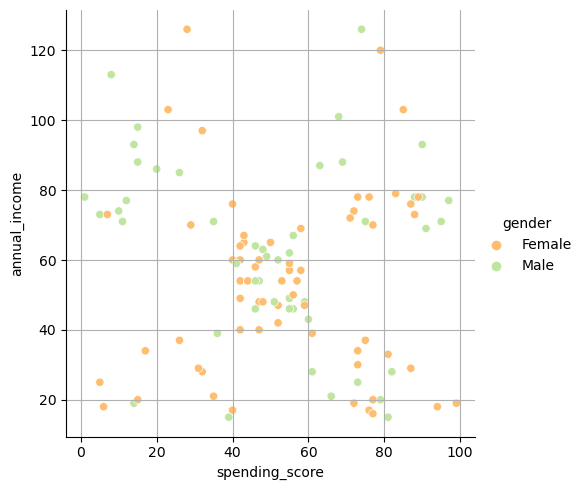

In [39]:
# plotting untouched data

sns.relplot(data = trainm, x = 'spending_score', y = 'annual_income', hue = 'gender', palette = 'Spectral')
plt.grid()
plt.show()

In [40]:
# setting x variable

Xm = trainm[['spending_score', 'annual_income']]
Xm.sample(4)

,spending_score,annual_income
195,79,120
136,7,73
144,12,77
127,95,71


In [41]:
kmeans_mall = KMeans(n_clusters = 2, random_state = 23)

# fitting to x variable
kmeans_mall.fit(Xm)

# predicting on Xm
kmeans_mall.predict(Xm)

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0], dtype=int32)

In [42]:
# scaling the data

mm_scaler2 = MinMaxScaler()

Xm[['spending_score', 'annual_income']] = mm_scaler2.fit_transform(Xm[['spending_score', 'annual_income']])

Xm.head(3)

/var/folders/v1/7y2hc6q17wl2rjlpg8h9g78h0000gn/T/ipykernel_1813/2112207485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xm[['spending_score', 'annual_income']] = mm_scaler2.fit_transform(Xm[['spending_score', 'annual_income']])


,spending_score,annual_income
11,1.000000,0.036036
151,0.887755,0.567568
49,0.418367,0.225225


In [43]:
# creating scaled

kmeans_mall_scaled = KMeans(n_clusters = 3, random_state = 23)

kmeans_mall_scaled.fit(Xm[['spending_score', 'annual_income']])

KMeans(n_clusters=3, random_state=23)

In [44]:
# visualising the array

kmeans_mall_scaled.predict(Xm[['spending_score', 'annual_income']])

array([1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1,
       1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1,
       2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1], dtype=int32)

In [45]:
# creating new column for Xm df

Xm['scaled_clusters'] = kmeans_mall_scaled.predict(Xm[['spending_score', 'annual_income']])

/var/folders/v1/7y2hc6q17wl2rjlpg8h9g78h0000gn/T/ipykernel_1813/2282754616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xm['scaled_clusters'] = kmeans_mall_scaled.predict(Xm[['spending_score', 'annual_income']])


In [46]:
Xm.head()

,spending_score,annual_income,scaled_clusters
11,1.000000,0.036036,1
151,0.887755,0.567568,2
49,0.418367,0.225225,1
113,0.459184,0.441441,1
143,0.877551,0.549550,2


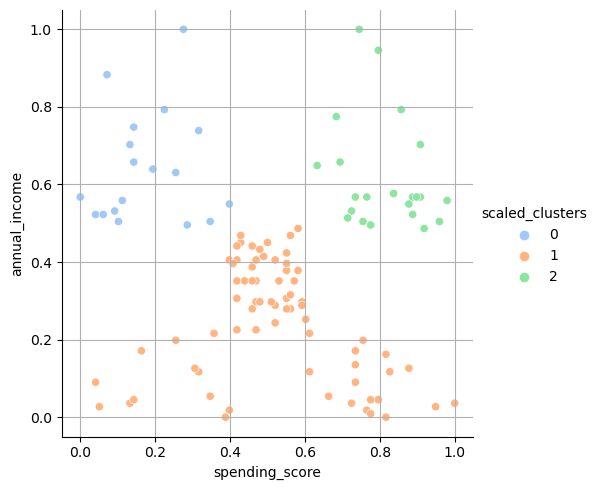

In [47]:
# plotting the clusters

sns.relplot(data = Xm, x = 'spending_score', y = 'annual_income', hue = 'scaled_clusters', palette = 'pastel')
plt.grid()
plt.show()

In [48]:
# numeric / theoretical centre of the clusters

kmeans_mall_scaled.cluster_centers_

array([[0.16809882, 0.63774301],
       [0.52515091, 0.24400457],
       [0.81539889, 0.61834562]])

In [49]:
# where the inertia drops off

kmeans_mall_scaled.inertia_

5.454336701167965

In [50]:
# creating inertia loop

inertia = []
seed = 23

for n in range(1, 8): 
    # n clusters allows for clusters to increment as the loop loops
    kmeans = KMeans(n_clusters = n, random_state = seed)
    
    kmeans.fit(Xm[['spending_score', 'annual_income']])
    
    # append the inertia of the particular model to the list of inertias
    inertia.append(kmeans.inertia_)
    
inertia

[13.551536642716801,
 8.617842765835345,
 5.454336701167965,
 3.3399420227820915,
 2.049266623862099,
 1.7087985276550275,
 1.4482757513035258]

In [51]:
# df of inertia

mall_inertia_df = pd.DataFrame({'n_clusters' : list(range(1, 8)),
                                'inertia' : inertia})

mall_inertia_df 

,n_clusters,inertia
0,1,13.551537
1,2,8.617843
2,3,5.454337
3,4,3.339942
4,5,2.049267
5,6,1.708799
6,7,1.448276


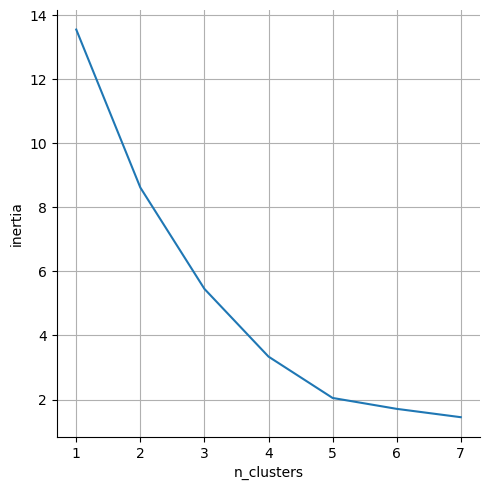

In [52]:
sns.relplot(data = mall_inertia_df, x = 'n_clusters', y = 'inertia', kind = 'line')
plt.grid()
plt.show()

Takeaway : 5 is the best number of clusters with scaled mall data.

### comparing with unscaled mall


In [60]:
### comparing with unscaled mall

Xmu = trainm[['spending_score', 'annual_income']]

kmeans_mall_un = KMeans(n_clusters = 5, random_state = 23)

# fitting to x variable
kmeans_mall_un.fit(Xmu)

# predicting on Xm
kmeans_mall_un.predict(Xmu)

array([3, 2, 1, 1, 2, 1, 1, 1, 0, 0, 4, 2, 4, 2, 1, 2, 4, 4, 0, 1, 0, 1,
       3, 2, 1, 0, 2, 0, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 1, 2, 4, 2, 1, 2,
       1, 1, 0, 1, 3, 2, 0, 4, 2, 1, 0, 2, 1, 1, 2, 1, 3, 4, 2, 0, 0, 1,
       2, 2, 1, 1, 0, 1, 2, 4, 1, 1, 3, 0, 1, 2, 2, 3, 3, 0, 3, 1, 4, 1,
       2, 0, 1, 1, 0, 1, 3, 3, 1, 1, 1, 3, 4, 1, 1, 3, 4, 1, 0, 1, 3, 1,
       1, 4], dtype=int32)

In [61]:
Xm['unscaled_clusters'] = kmeans_mall_un.predict(Xmu[['spending_score', 'annual_income']])

/var/folders/v1/7y2hc6q17wl2rjlpg8h9g78h0000gn/T/ipykernel_1813/674617421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xm['unscaled_clusters'] = kmeans_mall_un.predict(Xmu[['spending_score', 'annual_income']])


In [62]:
Xm.sample(3)
# sample of scaled mall data

,spending_score,annual_income,scaled_clusters,unscaled_clusters
122,0.581633,0.486486,1,1
135,0.887755,0.522523,2,2
6,0.051020,0.027027,1,4


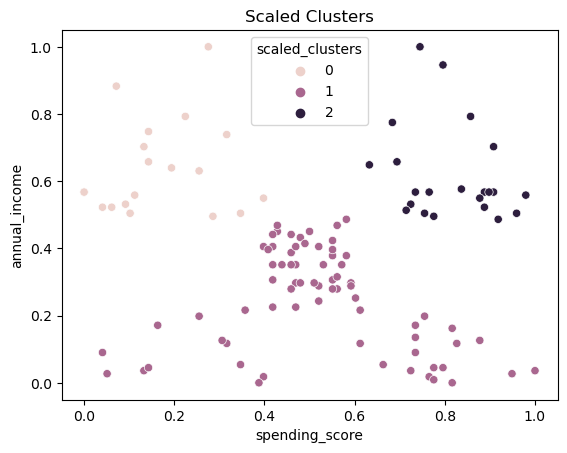

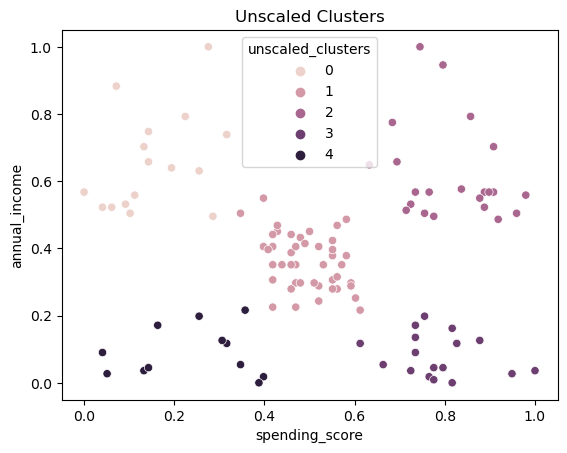

In [63]:
sns.scatterplot(x = 'spending_score', y = 'annual_income', data = Xm, hue = 'scaled_clusters')
plt.title('Scaled Clusters')
plt.show()

sns.scatterplot(x = 'spending_score', y = 'annual_income', data = Xm, hue = 'unscaled_clusters')
plt.title('Unscaled Clusters')
plt.show()

In [64]:
# creating mall unscaled  inertia loop

inertia = []
seed = 23

for n in range(1, 8): 
    # n clusters allows for clusters to increment as the loop loops
    kmeans = KMeans(n_clusters = n, random_state = seed)
    
    kmeans.fit(Xmu)
    
    # append the inertia of the particular model to the list of inertias
    inertia.append(kmeans.inertia_)
    
inertia

[146960.59821428574,
 96067.66794871795,
 58749.006538084344,
 36970.81907829586,
 22849.64349376114,
 18681.62329174094,
 15565.341693266455]

In [65]:
# X mall unscaled dataframe

Xmu_inertia_df = pd.DataFrame({'n_clusters' : list(range(1, 8)),
                               'inertia' : inertia})
                               
Xmu_inertia_df

,n_clusters,inertia
0,1,146960.598214
1,2,96067.667949
2,3,58749.006538
3,4,36970.819078
4,5,22849.643494
5,6,18681.623292
6,7,15565.341693


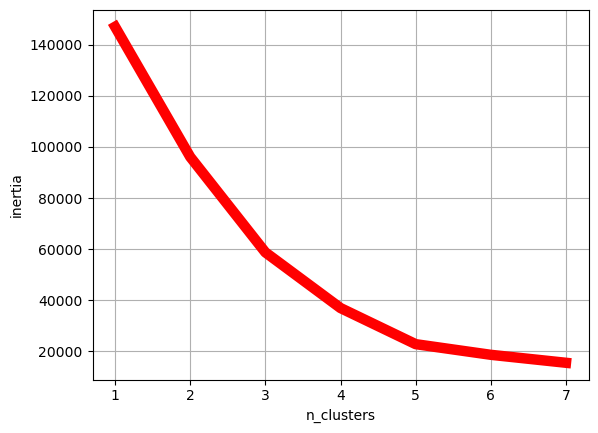

In [66]:
# elbow plot

sns.lineplot(data = Xmu_inertia_df, x = 'n_clusters', y = 'inertia', color = 'r', linewidth = 7.5)
plt.grid()
plt.show()

TAkeaway : It appears that 5 is the best number of clusters with unscaled mall data.  

The elbow & number of clusters is the same as for the scaled data.